# A* Heuristics Comparison

Notes:
- This notebook integrates with the repository’s modular structure and directly imports the required components such as `environment.py`, `path_planner.py`, `visualization.py`, `animation.py`, `rover.py`.

## Overview of the Five Heuristic Functions

1. Euclidean — straight-line distance.
2. Manhattan — axis-aligned distance useful for 4-connected grids.
3. Weighted Euclidean — Euclidean scaled by a factor (>1) to bias the search.
4. Risk-Aware — adds a safety penalty near obstacles/hazards.


In [32]:
# Cell 1: Imports and Environment Setup (run this first)
import os
from environment import Environment
from path_planner import AStarPlanner
from rover import Rover
from reflex_agent import ReflexAgent
from animation import create_animation_with_events
from IPython.display import display, Image
import matplotlib.pyplot as plt
import pandas as pd

os.makedirs('output', exist_ok=True)
env = Environment(width=20, height=20, dust_storms_enabled=False)
env.create_sample_environment()
start = (1, 1)
goal = (13, 13)

## 1.Euclidean distance

The Euclidean heuristic computes the straight-line (as-the-crow-flies) distance between the current node and the goal. When movement cost correlates with geometric distance and diagonal motion is allowed at proportional cost, Euclidean distance gives an admissible and consistent estimate of remaining cost. It is rotationally symmetric and encourages direct paths, which often reduces node expansions in open or lightly obstructed maps. A key advantage is computational simplicity — it’s cheap to compute and provides a smooth gradient toward the goal.

However, Euclidean can underrepresent difficulty in discrete grid worlds with non-uniform terrain costs or obstacles: it does not encode risk or terrain, so the planner guided purely by Euclidean may attempt straight-line approaches that hit high-cost sandy regions or radiation hazards. It remains a solid default where movement cost is metric-like and optimality is important, but for safety- or cost-sensitive tasks it may be useful to augment Euclidean with domain-aware penalties.

  ☀️ DAY - Full solar recharge! Battery: 100%

🎬 Creating animation with 25 frames...
💾 Saving animation to output/rover_euclidean.gif...
✅ Animation saved successfully!


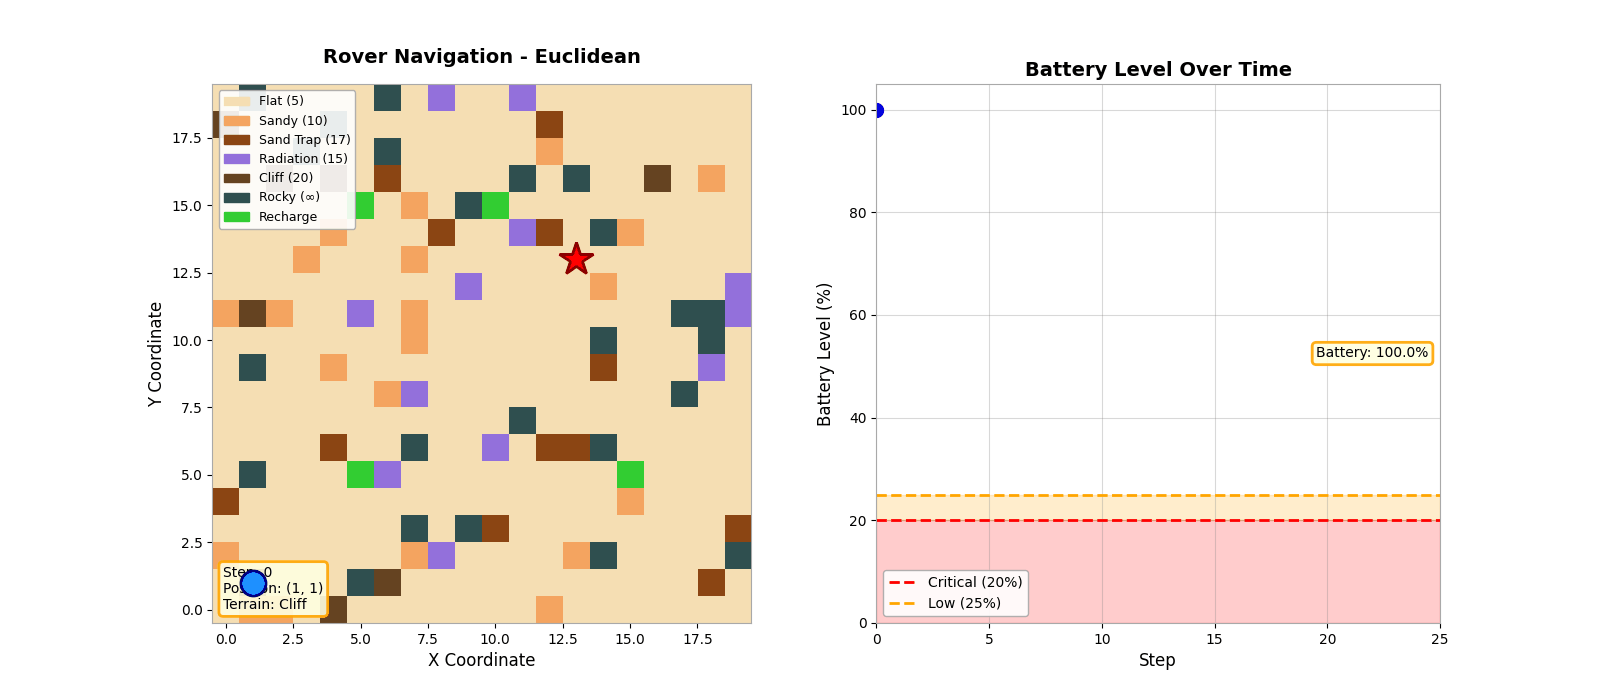

Euclidean Heuristic:
Path Length: 25, Path Cost: 115, Nodes Expanded: 268


In [ ]:
# Heuristic 1 - Euclidean
heuristic = "euclidean"
gif_path = f"output/rover_{heuristic}.gif"
rover = Rover(start_pos=start, battery_capacity=100)
planner = AStarPlanner(env)
reflex_agent = ReflexAgent(rover, env)

path = planner.plan_path(start, goal, heuristic)
battery_hist = [rover.get_battery_percentage()]
events = []
current_idx = 1
total_cost = 0
while rover.position != goal:
    if current_idx < len(path):
        next_move = path[current_idx]
    else:
        break
    rover.move_to(next_move, env)
    total_cost += env.get_movement_cost(next_move[0], next_move[1])
    battery_hist.append(rover.get_battery_percentage())
    current_idx += 1

if path and len(path) > 1:
    anim_path = create_animation_with_events(env, path, battery_hist, start, goal, heuristic, gif_path)
    display(Image(filename=anim_path))

print("Euclidean Heuristic:")
print(f"Path Length: {len(path) if path else 0}, Path Cost: {total_cost}, Nodes Expanded: {planner.get_stats().get('nodes_expanded', None)}")

## 2.Manhattan distance

Manhattan distance is the sum of absolute differences in the coordinates between two points (L1 distance). It models the minimum number of axis-aligned moves required in a grid where only cardinal (up/down/left/right) steps are allowed and each such step has uniform cost. Because it never overestimates the minimum number of cardinal moves, Manhattan is admissible for 4-connected grids and often tightly bounds the remaining cost in such settings. This tightness makes Manhattan efficient for grid-constrained movement: A* guided by Manhattan tends to expand nodes along plausible axis-aligned corridors rather than exploring diagonal shortcuts that the agent cannot take.

Manhattan is fast to compute (integer arithmetic on grid indices) and well-suited to maze-like layouts where diagonal moves are impossible or expensive. If diagonal moves are permitted or terrain costs vary significantly between cells, Manhattan becomes conservative and may steer search into longer patterns. It also does not incorporate obstacle or risk knowledge, so it should be paired with domain-aware heuristics when safety or varying movement costs matter.

  ☀️ DAY - Full solar recharge! Battery: 100%

🎬 Creating animation with 25 frames...
💾 Saving animation to output/rover_manhattan.gif...
✅ Animation saved successfully!


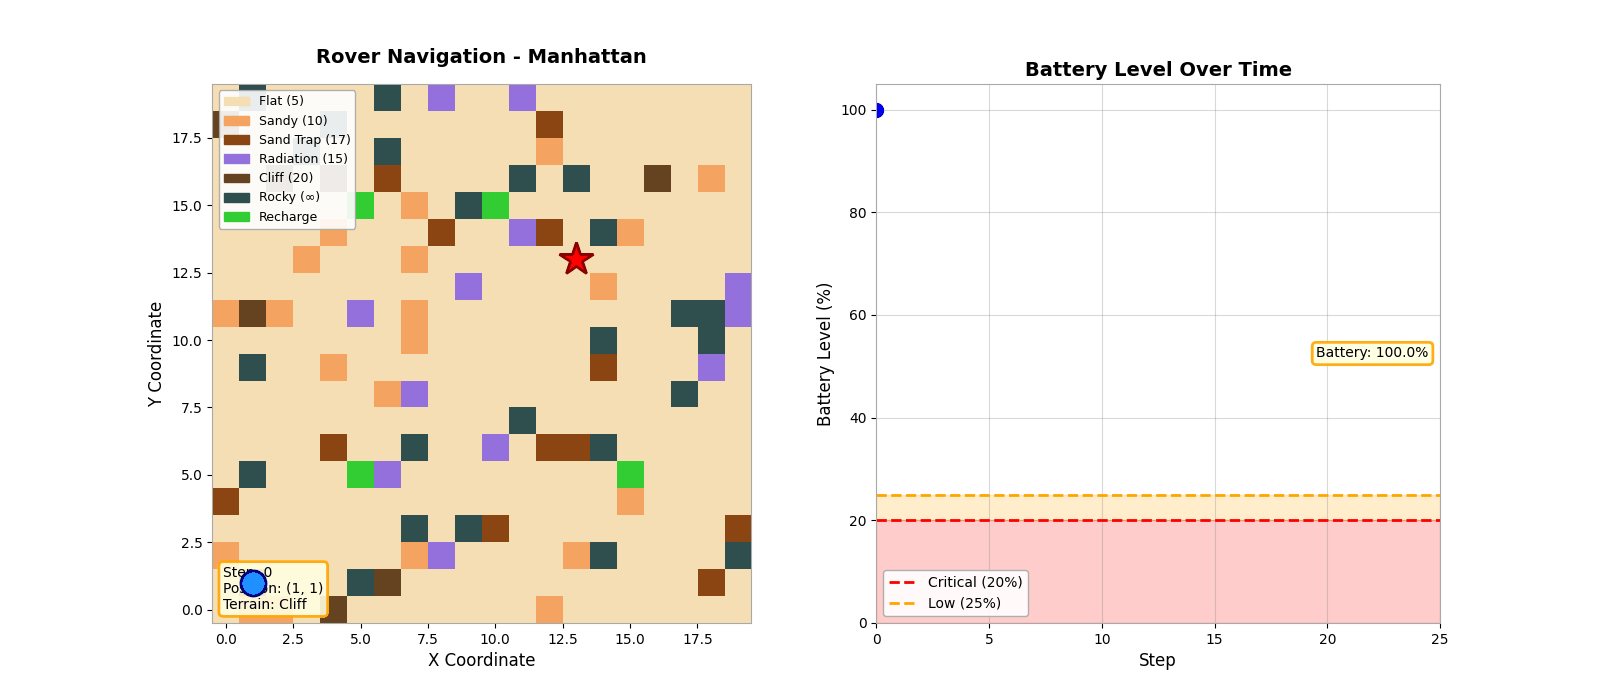

Manhattan Heuristic:
Path Length: 25, Path Cost: 115, Nodes Expanded: 258


In [24]:
# Heuristic 2 - Manhattan
heuristic = "manhattan"
gif_path = f"output/rover_{heuristic}.gif"
rover = Rover(start_pos=start, battery_capacity=100)
planner = AStarPlanner(env)
reflex_agent = ReflexAgent(rover, env)

path = planner.plan_path(start, goal, heuristic)
battery_hist = [rover.get_battery_percentage()]
events = []
current_idx = 1
total_cost = 0
while rover.position != goal:
    if current_idx < len(path):
        next_move = path[current_idx]
    else:
        break
    rover.move_to(next_move, env)
    total_cost += env.get_movement_cost(next_move[0], next_move[1])
    battery_hist.append(rover.get_battery_percentage())
    current_idx += 1

if path and len(path) > 1:
    anim_path = create_animation_with_events(env, path, battery_hist, start, goal, heuristic, gif_path)
    display(Image(filename=anim_path))

print("Manhattan Heuristic:")
print(f"Path Length: {len(path) if path else 0}, Path Cost: {total_cost}, Nodes Expanded: {planner.get_stats().get('nodes_expanded', None)}")

## Weighted Euclidean

Weighted Euclidean multiplies the straight-line Euclidean distance by a factor w > 1 to bias A* toward faster, greedy searches. The evaluation becomes f(n) = g(n) + w * h_euclidean(n). Increasing the weight makes the heuristic more influential relative to the cost-to-date, reducing node expansions at the cost of potential suboptimality. This approach (often called weighted A*) is useful when responsiveness and speed are more important than strict optimality.

When w > 1 the heuristic is generally not admissible — it may overestimate the true remaining cost — but in many practical applications the small optimality loss is acceptable given large gains in speed. Choosing w is a tuning exercise: slight increases above 1 give modest speedups with limited path degradation, while larger weights can drastically shrink search at the risk of poor-quality paths. Weighted Euclidean is a practical tool when you want quick, good-enough paths rather than provably optimal ones.

  ☀️ DAY - Full solar recharge! Battery: 100%

🎬 Creating animation with 25 frames...
💾 Saving animation to output/rover_weighted_euclidean.gif...
✅ Animation saved successfully!


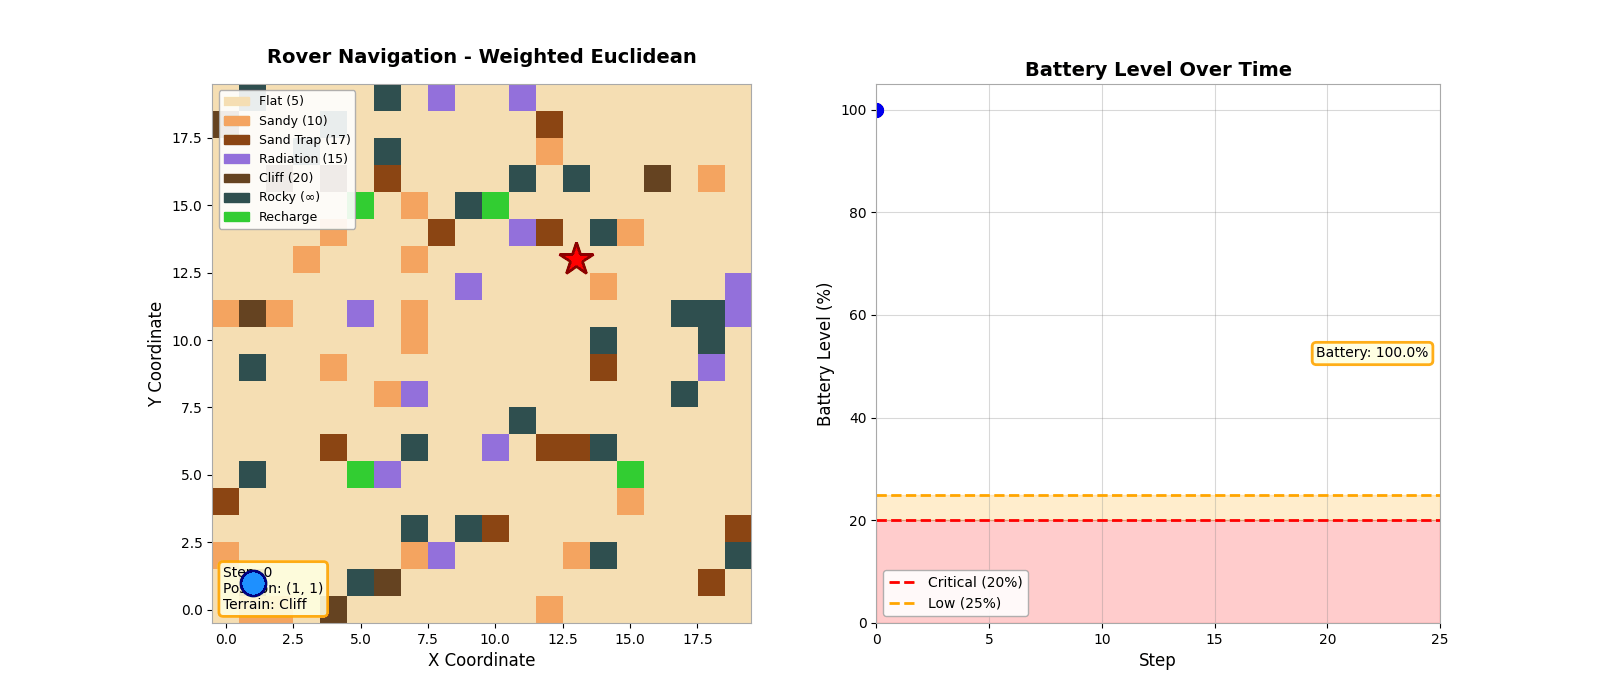

Weighted Euclidean Heuristic:
Path Length: 25, Path Cost: 115, Nodes Expanded: 249


In [25]:
# Heuristic 3 - Weighted Euclidean
heuristic = "weighted_euclidean"
gif_path = f"output/rover_{heuristic}.gif"
rover = Rover(start_pos=start, battery_capacity=100)
planner = AStarPlanner(env)
reflex_agent = ReflexAgent(rover, env)

path = planner.plan_path(start, goal, heuristic)
battery_hist = [rover.get_battery_percentage()]
events = []
current_idx = 1
total_cost = 0
while rover.position != goal:
    if current_idx < len(path):
        next_move = path[current_idx]
    else:
        break
    rover.move_to(next_move, env)
    total_cost += env.get_movement_cost(next_move[0], next_move[1])
    battery_hist.append(rover.get_battery_percentage())
    current_idx += 1

if path and len(path) > 1:
    anim_path = create_animation_with_events(env, path, battery_hist, start, goal, heuristic, gif_path)
    display(Image(filename=anim_path))

print("Weighted Euclidean Heuristic:")
print(f"Path Length: {len(path) if path else 0}, Path Cost: {total_cost}, Nodes Expanded: {planner.get_stats().get('nodes_expanded', None)}")

## Risk-Aware heuristic

Risk-Aware heuristics modify geometric distance estimates by adding a penalty that depends on proximity to hazardous cells (e.g., radiation spots). The goal is to prefer slightly longer but safer routes that keep distance from features that might damage the rover. A practical formulation is h(n) = euclidean(n, goal) + α·R(n), where R(n) aggregates risk contributions from nearby hazardous tiles. Typical choices for R(n) are sums of inverse distances to hazards or exponentially decayed penalties so that close hazards contribute strongly while distant hazards have little effect.

Risk-aware heuristics are usually not admissible because the added penalty can make the heuristic exceed the true minimal travel cost, but they are valuable in safety-critical domains where avoiding hazards matters more than absolute shortest distance. Designing R(n) requires care: too large an α forces unnecessarily circuitous routes, while too small an α has little effect. A robust implementation precomputes hazard distance fields so penalty evaluation is cheap per node. Risk-aware heuristics encode mission priorities (safety over shortest path) directly into the search.

  ☀️ DAY - Full solar recharge! Battery: 100%



🎬 Creating animation with 25 frames...
💾 Saving animation to output/rover_risk_aware.gif...
✅ Animation saved successfully!


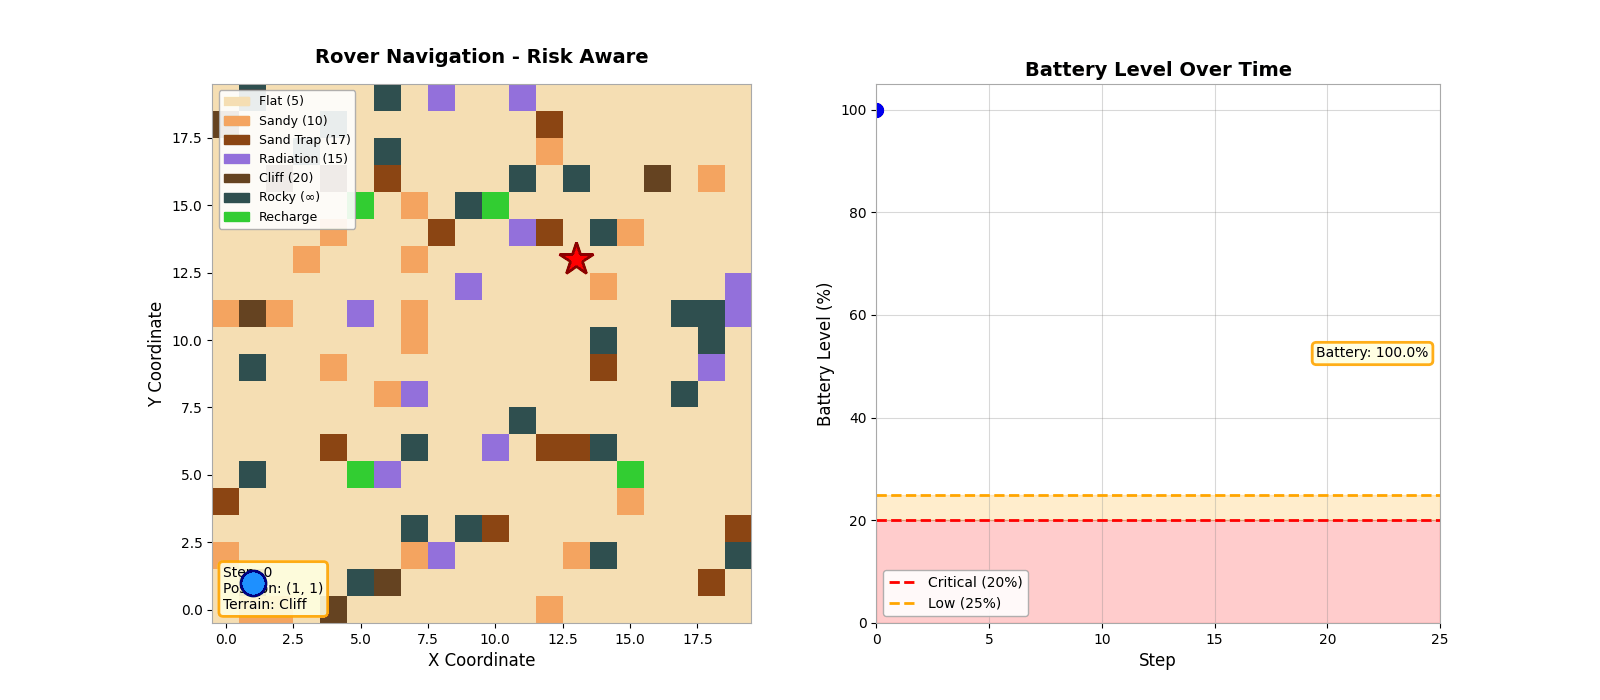

Risk-Aware Heuristic:
Path Length: 25, Path Cost: 115, Nodes Expanded: 271


In [26]:
# Heuristic 4 - Risk Aware
heuristic = "risk_aware"
gif_path = f"output/rover_{heuristic}.gif"
rover = Rover(start_pos=start, battery_capacity=100)
planner = AStarPlanner(env)
reflex_agent = ReflexAgent(rover, env)

path = planner.plan_path(start, goal, heuristic)
battery_hist = [rover.get_battery_percentage()]
events = []
current_idx = 1
total_cost = 0
while rover.position != goal:
    if current_idx < len(path):
        next_move = path[current_idx]
    else:
        break
    rover.move_to(next_move, env)
    total_cost += env.get_movement_cost(next_move[0], next_move[1])
    battery_hist.append(rover.get_battery_percentage())
    current_idx += 1

if path and len(path) > 1:
    anim_path = create_animation_with_events(env, path, battery_hist, start, goal, heuristic, gif_path)
    display(Image(filename=anim_path))

print("Risk-Aware Heuristic:")
print(f"Path Length: {len(path) if path else 0}, Path Cost: {total_cost}, Nodes Expanded: {planner.get_stats().get('nodes_expanded', None)}")

Path Cost  Path Length  Nodes Expanded  \
euclidean                 115           25             268   
manhattan                 115           25             258   
weighted_euclidean        115           25             249   
risk_aware                115           25             271   

                                               Gif Path  Path Found  
euclidean                    output/rover_euclidean.gif        True  
manhattan                    output/rover_manhattan.gif        True  
weighted_euclidean  output/rover_weighted_euclidean.gif        True  
risk_aware                  output/rover_risk_aware.gif        True

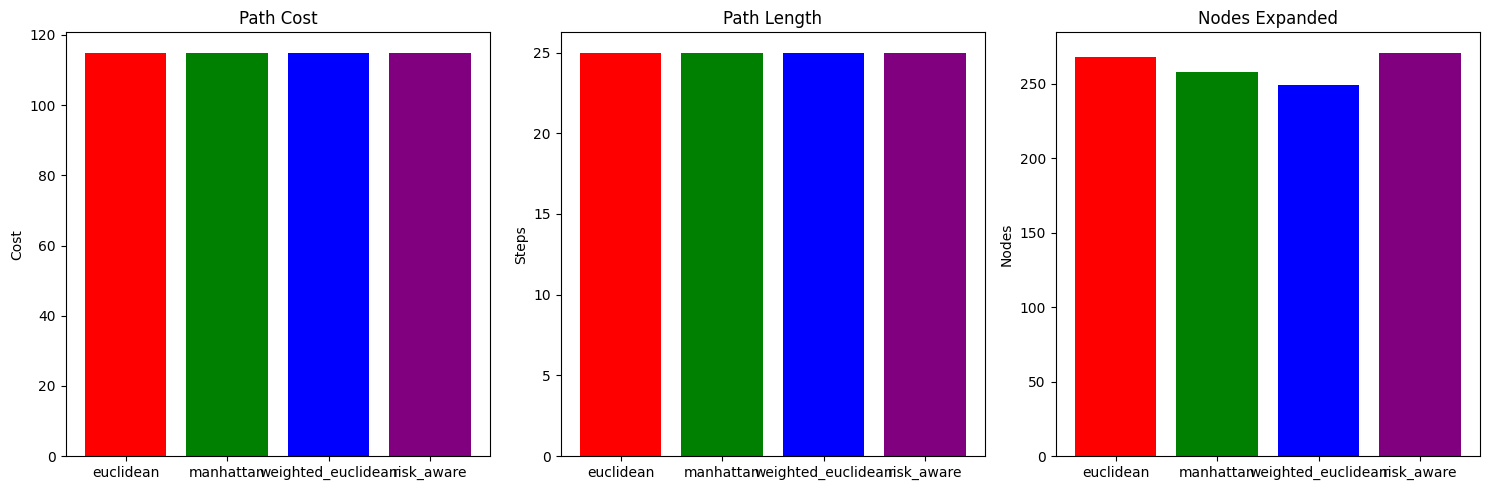

In [31]:
# Statistics Table and Plots Comparison

results = {}

for heuristic in [
    'euclidean','manhattan','weighted_euclidean',
    'risk_aware'
]:
    gif_path = f"output/rover_{heuristic}.gif"
    rover = Rover(start_pos=start, battery_capacity=100)
    planner = AStarPlanner(env)
    path = planner.plan_path(start, goal, heuristic)
    total_cost = sum(env.get_movement_cost(x,y) for x,y in path[1:]) if path else None
    res = {
        "Path Cost": total_cost,
        "Path Length": len(path) if path else None,
        "Nodes Expanded": planner.get_stats().get('nodes_expanded', None),
        "Gif Path": gif_path,
        "Path Found": bool(path)
    }
    results[heuristic] = res

df = pd.DataFrame.from_dict(results, orient='index')
display(df)

import matplotlib.pyplot as plt

found_heuristics = [h for h in results if results[h].get('Path Found')]
costs = [results[h]['Path Cost'] for h in found_heuristics]
lengths = [results[h]['Path Length'] for h in found_heuristics]
nodes = [results[h]['Nodes Expanded'] for h in found_heuristics]

# Assign a unique color for each heuristic
color_map = {
    'euclidean': 'red',
    'manhattan': 'green',
    'weighted_euclidean': 'blue',
    'risk_aware': 'purple',
    'turn_penalty': 'orange',
    'aggressive_manhattan': 'cyan'
}

bar_colors = [color_map[h] for h in found_heuristics]

plt.figure(figsize=(15, 5))

# --- Path Cost ---
plt.subplot(1,3,1)
plt.bar(found_heuristics, costs, color=bar_colors)
plt.title('Path Cost')
plt.ylabel('Cost')

# --- Path Length ---
plt.subplot(1,3,2)
plt.bar(found_heuristics, lengths, color=bar_colors)
plt.title('Path Length')
plt.ylabel('Steps')

# --- Nodes Expanded ---
plt.subplot(1,3,3)
plt.bar(found_heuristics, nodes, color=bar_colors)
plt.title('Nodes Expanded')
plt.ylabel('Nodes')

plt.tight_layout()
plt.show()
